# Airline overbooking for maximum profit

Airlines are known to overbook their flights to maximize their profits per flight.
Overbooking is based on the fact that not all reserved seats are actually used, in other words, a passenger won't show up on the flight.

If a flight is not overbooked enough, potential profits are never collected.
If there's too much overbooking, all the passengers won't have a seat on the flight and they have to be compensated financially. This means extra expenses for the airline.
The goal is to determine the optimal point of overbooking to maximize the profit. 


In [258]:
import numpy as np
import pymc3 as pm
import seaborn as sns
import pandas as pd

In [259]:
# This kind of information could be calculated from the airline's flight history data
prob_passenger_on_flight = 0.95

In [260]:
def passenger_on_flight(prob):
    return np.random.rand() < prob

In [261]:
# revenue = total tickets sold
# compensation loss = passengers without a seat * amount of compensation
# profit = revenue - expenses

In [262]:
# Flight simulation
# Simulates how many passengers actually show up on the flight
def simulate_flight(prob_passenger_on_flight, tickets_sold):
    passengers_on_flight = 0
    for x in range(tickets_sold):
        passengers_on_flight += passenger_on_flight(prob_passenger_on_flight)
    return passengers_on_flight


In [263]:
def simulate_revenue(tickets_sold, seats_in_plane, ticket_price, compensation_price):
    # How many passengers took their seats
    seats_used = simulate_flight(prob_passenger_on_flight, tickets_sold)

    # No extra passengers showed up
    if seats_used <= seats_in_plane:
        return ticket_price * tickets_sold
    else:
        # Extra passengers are needed to be compensated
        return seats_in_plane * ticket_price - (seats_used - seats_in_plane) * compensation_price
        

In [264]:
seats_in_plane = 100
ticket_price = 350
compensation_price = 2 * ticket_price

In [265]:
flight_count = 100000
max_overbooking = 15

revenues = np.zeros([flight_count, max_overbooking + 1])

for f in range(flight_count):
    for ob in range(max_overbooking + 1):
        revenues[f, ob] = simulate_revenue(seats_in_plane + ob,
                                           seats_in_plane,
                                           ticket_price,
                                           compensation_price)

<AxesSubplot:>

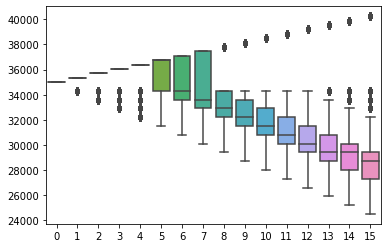

In [266]:
sns.boxplot(data=revenues)

In [267]:
df = pd.DataFrame(revenues)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,35000.0,35344.309000,35649.033000,35834.515500,35809.851000,35537.075000,35016.058000,34324.689000,33544.903000,32760.521500,31987.235000,31265.066000,30561.335000,29869.241500,29194.221000,28524.517000
std,0.0,77.092295,276.327394,633.321416,1100.788161,1568.622947,1943.769154,2161.361103,2207.606703,2139.109787,2005.734724,1883.694879,1772.107367,1703.774594,1667.861961,1654.006885
min,35000.0,34300.000000,33600.000000,32900.000000,32200.000000,31500.000000,30800.000000,30100.000000,29400.000000,28700.000000,28000.000000,27300.000000,26600.000000,25900.000000,25200.000000,24500.000000
25%,35000.0,35350.000000,35700.000000,36050.000000,36400.000000,34300.000000,33600.000000,32900.000000,32200.000000,31500.000000,30800.000000,30100.000000,29400.000000,28700.000000,28000.000000,27300.000000
50%,35000.0,35350.000000,35700.000000,36050.000000,36400.000000,36750.000000,34300.000000,33600.000000,32900.000000,32200.000000,31500.000000,30800.000000,30100.000000,29400.000000,29400.000000,28700.000000
75%,35000.0,35350.000000,35700.000000,36050.000000,36400.000000,36750.000000,37100.000000,37450.000000,34300.000000,33600.000000,32900.000000,32200.000000,31500.000000,30800.000000,30100.000000,29400.000000
max,35000.0,35350.000000,35700.000000,36050.000000,36400.000000,36750.000000,37100.000000,37450.000000,37800.000000,38150.000000,38500.000000,38850.000000,39200.000000,39550.000000,39900.000000,40250.000000


## Conclusion

It seems that booking 4 seats over the flight seat capacity gives the most revenue with low uncertainty.
Overbooking 5-7 seats might produce more revenue but the results are way more uncertain compared to 4 seats. After 8 seats, the revenue dips significantly.